In [3]:
'''
Produce sphere with MullerBrown potential and a gradient extremal 
from rightmost minimum.
'''

from SphericalMB import SphericalMB
from utils import plot_spherical_potential, plot_points3d

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from mayavi import mlab
from scipy.linalg import eigvalsh


import os
import sys
_THIS_DIR = os.path.dirname(__file__) if '__file__' in globals() else os.getcwd()
_REPO_ROOT = os.path.abspath(os.path.join(_THIS_DIR, '..'))
_SRC_DIR = os.path.join(_REPO_ROOT, 'src')
if _SRC_DIR not in sys.path:
    sys.path.insert(0, _SRC_DIR)

print('Inserted to sys.path:', _SRC_DIR)

Inserted to sys.path: c:\Users\roshr\gradient_extremals_on_manifolds\src


In [5]:
# Imports (guard mayavi so the notebook can run without it)
from SimplePotential import SimplePotential
from utils import plot_spherical_potential, plot_points3d

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from scipy.linalg import eigvalsh

# # mayavi is optional for 3D plotting — guard the import
# try:
#     from mayavi import mlab
#     _HAS_MAYAVI = True
# except Exception as _err:
#     print('mayavi import failed:', _err)
#     _HAS_MAYAVI = False

from gradient_extremals_on_manifolds.Continuation import Continuation

In [6]:
plt.close()

DEFAULT_VERBOSE = False

MODE = 0
# modes: 
# gradient extremals: 0
# y-nullcline: 1

mb = SphericalMB()
fixed_points = mb.get_fixed_points(manifold=True)
fixed_points_2D = jax.vmap(mb.phi)(fixed_points)

_, vec = jnp.linalg.eigh(mb.hess(fixed_points_2D[0]))
initial = fixed_points_2D[0]
lam = eigvalsh(mb.hess(initial))[0]



In [7]:

if MODE == 0:
   initial -= vec[0]*0.01 
   initial_point = jnp.array([initial[0], initial[1], lam, mb.potential(initial)])
   functions = [mb.lucia_phi, mb.lucia_hessian_eq1, mb.lucia_hessian_eq2]
   tolerance = 5
   h = -8.0
   maxiter = 1200
elif MODE == 1:
   initial_point = jnp.array([initial[0], initial[1]])
   functions = [mb.y_nullcline]
   tolerance = 0.001
   h = -0.01
   maxiter = 800
else:
   raise Exception("MODE not available. Choose other MODE.")


In [8]:


gradient_extremal = Continuation(initial_point=initial_point,
                                 functions = functions,
                                 maxiter = maxiter,
                                 verbose = DEFAULT_VERBOSE,
                                 tolerance = tolerance,
                                 h = h)



In [9]:

gradient_extremal.start()
gradient_extremal_points = gradient_extremal.getPoints()


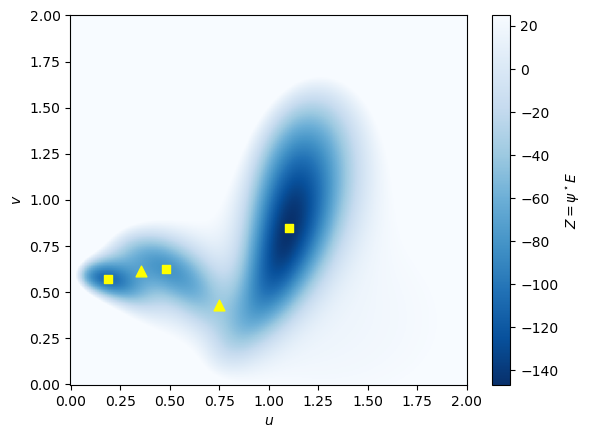

In [ ]:

mb.plot_color_mesh(colorbarTitle=r'$Z=\psi^\star E$', vrangeOn=True)
plt.plot(list(zip(*gradient_extremal_points))[0],
         list(zip(*gradient_extremal_points))[1], color="orange")
plt.scatter(x=fixed_points_2D[[0,2,4],0], y=fixed_points_2D[[0,2,4],1],
            color="Yellow", marker="s", zorder=15)
plt.scatter(x=fixed_points_2D[[1,3],0], y=fixed_points_2D[[1,3],1],
            color="Yellow", marker="^", s=60, zorder=20)
plt.xlabel(r"$u$")
plt.ylabel(r"$v$")

plt.show()

gradient_extremal_3D = jax.vmap(mb.psi)(jnp.array(gradient_extremal_points)[:,0:2])

# ## plotting


In [12]:

plot_spherical_potential(mb.E)
plot_points3d(gradient_extremal_3D, s=[ 1 for i in range(len(gradient_extremal_points))],
              color=(1.0, 0.65, 0.0))
plot_points3d(fixed_points[[0,2,4],:], s=[ 1 for i in range(len(fixed_points[[0,2,4],:]))],
              color = (1.0, 1.0, 0.0), mode="cube", scale_factor=0.05)
plot_points3d(fixed_points[[1,3],:], s=[ 1 for i in range(len(fixed_points[[1,3],:]))],
              color = (1.0, 1.0, 0.0), mode="sphere", scale_factor=0.05)

mlab.show()